### <div align="center">***DATA CLEANING AND EDA***</div>

### ***Import libraries and modules***

In [ ]:
# Import required libraries

import os
import numpy as np
import pandas as pd
from pathlib import Path
from scipy.stats import skew, kurtosis

import seaborn as sns 
import matplotlib.pyplot as plt

from itertools import combinations
from scipy.stats import pearsonr, spearmanr, f_oneway, chi2_contingency

### ***Data Loading and exploration***

In [57]:
# Get data path
BASE_DIR = Path.cwd().parent 
data_path = BASE_DIR / "Data" / "Raw" / "amazon_delivery.csv"

# Load dataset
data = pd.read_csv(data_path)
print("Data loaded successfully")

Data loaded successfully


In [58]:
# View top 5 rows of the dataset 
data.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [59]:
# View bottom 5 rows of the dataset 
data.tail()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen
43738,nsyz997960170,23,4.9,23.351058,85.325731,23.431058,85.405731,2022-03-02,17:10:00,17:15:00,Fog,Medium,scooter,Metropolitian,180,Cosmetics


In [60]:
# Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [61]:
# No. of rows & columns in the dataset
print(f'No. of rows in the dataset: {data.shape[0]}')
print(f'No. of columns in the dataset: {data.shape[1]}')

No. of rows in the dataset: 43739
No. of columns in the dataset: 16


In [62]:
# No. of duplicates in the dataset
print(f'No. of duplicate rows found in the dataset: {data.duplicated().sum()}')

No. of duplicate rows found in the dataset: 0


In [63]:
# No. of missing values in the dataset
def missing_values(df):

    total_rows = df.shape[0]
    missing_rows = df.isnull().sum().sum()
    non_missing_rows = total_rows - missing_rows

    print(f'Total no. of rows in dataset: {total_rows}')
    print(f'Total no. of missing rows in dataset: {missing_rows}')
    print(f'Total no. of non-missing rows in dataset: {non_missing_rows}\n')

    missing_count = df.isnull().sum()
    missing_percent = 100 * df.isnull().sum() / len(df)
    
    summary = pd.DataFrame({
        'Missing Values': missing_count,
        'Percentage': missing_percent.round(2)
    })
    
    print('Missing Data summary:')
    summary = summary[summary['Missing Values'] > 0]
    return summary.sort_values(by='Percentage', ascending=False)

summary = missing_values(data)
print(summary)

Total no. of rows in dataset: 43739
Total no. of missing rows in dataset: 145
Total no. of non-missing rows in dataset: 43594

Missing Data summary:
              Missing Values  Percentage
Weather                   91        0.21
Agent_Rating              54        0.12


In [64]:
# Descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Agent_Age,43739.0,29.567137,5.815155,15.000000,25.000000,30.000000,35.000000,50.000000
Agent_Rating,43685.0,4.633780,0.334716,1.000000,4.500000,4.700000,4.900000,6.000000
Store_Latitude,43739.0,17.210960,7.764225,-30.902872,12.933298,18.551440,22.732225,30.914057
Store_Longitude,43739.0,70.661177,21.475005,-88.366217,73.170283,75.898497,78.045359,88.433452
Drop_Latitude,43739.0,17.459031,7.342950,0.010000,12.985996,18.633626,22.785049,31.054057
Drop_Longitude,43739.0,70.821842,21.153148,0.010000,73.280000,76.002574,78.104095,88.563452
Delivery_Time,43739.0,124.905645,51.915451,10.000000,90.000000,125.000000,160.000000,270.000000


In [65]:
data.describe(include='object').T

,count,unique,top,freq
Order_ID,43739,43739,ialx566343618,1
Order_Date,43739,44,2022-03-15,1141
Order_Time,43739,177,21:55:00,460
Pickup_Time,43739,193,21:30:00,481
Weather,43648,6,Fog,7440
Traffic,43739,5,Low,14999
Vehicle,43739,4,motorcycle,25527
Area,43739,4,Metropolitian,32698
Category,43739,16,Electronics,2849


In [66]:
data.nunique()

Order_ID           43739
Agent_Age             22
Agent_Rating          28
Store_Latitude       521
Store_Longitude      415
Drop_Latitude       4367
Drop_Longitude      4367
Order_Date            44
Order_Time           177
Pickup_Time          193
Weather                6
Traffic                5
Vehicle                4
Area                   4
Delivery_Time         89
Category              16
dtype: int64

#### <div align="center">***Dataset Understanding***</div>
---

- ***The dataset contains detailed information about e-commerce deliveries*** (order details, delivery agent demographics, geographic coordinates, timestamps, & contextual factors such as traffic, weather, and area type).
- The dataset consists of ***43739 rows*** & ***16 columns***. 
- The ***target variable*** is ***Delivery_Time*** (in hours), which represents the actual time taken to complete a delivery.
- It is a ***fairly clean dataset*** with ***no duplicate values*** and ***only 0.33% missing values*** overall (Weather = 91, Agent_Rating = 54).
- ***Some columns need data type conversion*** (dates and times should be converted to datetime).

#### <div align="center">***Variable Understanding***</div>
---
***Numerical variables: 7***

- ***Agent_Age:*** 
  - Age of the delivery agent.
  - Values range from 15-50, with most agents in their 25s-35s. 
  - Distribution appears normal with no extreme outliers.
  
- ***Agent_Rating:*** 
  - Rating of the delivery agent.
  - Values range from 1–6 (though expected to be on a 1–5 scale). 
  - Distribution skews towards higher ratings, suggesting most agents are rated positively.
  - There are 54 missing values and the value 6 may indicate a data entry anomaly which needs cleaning or capping. 
  
- ***Store_Latitude/Longitude:*** 
  - Geographic location of the store.
  - Appears consistent with no obvious invalid coordinates.
  
- ***Drop_Latitude/Longitude:*** 
  - Geographic location of the delivery address.
  - Appears consistent with no obvious invalid coordinates.
  - Useful for calculating distances.
  
- ***Delivery_Time:*** **Target variable** 
  - Represents the actual time taken for delivery (in hours).
  - Ranges from 10-270 hours, ost deliveries are completed within 4–11 days, though a few extreme long deliveries exist (up to ~11 days).
  - Distribution shows right skew → a few long deliveries (possible outliers).
---
***Categorical vaariables: 9***

- ***Order_ID:*** 
  - Unique identifier for each order.
  - No duplicates observed. Can be dropped as it is purely an identifier column.
  
- ***Order_Date/Order_Time:*** 
  - Date and time when the order was placed. Both are of object data types.
  - Convert to datetime format & extract time-based features (day of week, hour, etc).
  
- ***Pickup_Time:*** 
  - Time when the delivery agent picked up the order.
  - Object data type, convert to datetime format & use it to calculate order-to-pickup delay.

- ***Weather:*** 
  - Weather conditions during delivery.
  - Has 6 unique categories of weather with Fog being the most frequent weather type.
  - Also has 91 missing values that needs handling.
  
- ***Traffic:*** 
  - Traffic conditions during delivery.
  - Has 5 differents categories of traffic with traffic being Low most of the times.
 
- ***Vehicle:*** 
  - Mode of transportation used for delivery.
  - Has 4 differents categories of vehicle with most used transportation being motorcycle.
  
- ***Area:*** 
  - Type of delivery area (Urban/Metropolitan).
  - Has 4 differents categories of Area with most orders being delivered in a Metropolitan area.

- ***Category:*** 
  - Category of the product being delivered.
  - Has 16 different types of products being delivered with Electronics being the most delivered product.

### ***Data Cleaning***

In [67]:
# Create a copy of the dataframe
clean_data = data.copy()

In [68]:
# Handle anomalies detected in Agent_Rating 1st & then impute missing values with median

print(len(clean_data[clean_data['Agent_Rating'] > 5])) # Checks no. of anomalies 
clean_data.loc[clean_data['Agent_Rating'] > 5, 'Agent_Rating'] = 5 # Cap values > 5 to 5
clean_data['Agent_Rating'].describe().T # Check after capping

53


count    43685.000000
mean         4.632567
std          0.331560
min          1.000000
25%          4.500000
50%          4.700000
75%          4.900000
max          5.000000
Name: Agent_Rating, dtype: float64

In [69]:
# Impute missing values with median
clean_data['Agent_Rating'] = clean_data['Agent_Rating'].fillna(clean_data['Agent_Rating'].median()) 
clean_data['Agent_Rating'].isnull().sum()

0

In [70]:
# Inspect rows where weather is NaN
clean_data[clean_data['Weather'].isnull()] 

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
2286,xige084493792,15,1.0,-26.891191,75.802083,26.981191,75.892083,2022-03-12,NaN,17:20:00,NaN,NaN,motorcycle,Urban,75,Home
2779,oilg311747812,15,1.0,22.750040,75.902847,22.810040,75.962847,2022-04-03,NaN,20:30:00,NaN,NaN,scooter,Metropolitian,145,Kitchen
2825,pbox816153129,15,1.0,21.149569,72.772697,21.209569,72.832697,2022-03-21,NaN,22:10:00,NaN,NaN,bicycle,Metropolitian,100,Clothing
3438,nzsa056960624,50,5.0,-12.970324,-77.645748,13.010324,77.685748,2022-03-13,NaN,12:30:00,NaN,NaN,van,Urban,125,Cosmetics
4514,eids248121351,50,5.0,-17.451976,-78.385883,17.561976,78.495883,2022-04-04,NaN,23:20:00,NaN,NaN,bicycle,Metropolitian,135,Jewelry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40359,lasg907081524,50,5.0,22.751234,75.889490,22.781234,75.919490,2022-03-17,NaN,20:40:00,NaN,NaN,scooter,Metropolitian,140,Apparel
41088,wgdm794380305,50,5.0,-12.939496,77.625999,12.949496,77.635999,2022-03-19,NaN,09:40:00,NaN,NaN,van,Metropolitian,95,Books
42598,llox673359294,15,1.0,0.000000,0.000000,0.070000,0.070000,2022-03-14,NaN,17:40:00,NaN,NaN,scooter,Metropolitian,170,Jewelry
43053,ifig993965994,15,1.0,13.086438,80.220672,13.216439,80.350672,2022-03-18,NaN,18:00:00,NaN,NaN,van,Urban,130,Jewelry


In [71]:
clean_data['Traffic'].value_counts()

Traffic
Low        14999
Jam        13725
Medium     10628
High        4296
NaN           91
Name: count, dtype: int64

- Traffic has "NaN" as string placeholders, not real missing values, which is why .isnull().sum() shows 0, but we see NaN visually when inspecting subsets.
- Let's standardized placeholder strings like "NaN", "null", "None", & blanks across all object columns by stripping whitespace & replacing them with real NaN values, ensuring pandas correctly recognizes them as missing data.

In [72]:
# Standardized placeholder strings with NaN in categorical variables
for col in clean_data.select_dtypes(include=['object']).columns:
    clean_data[col] = clean_data[col].astype(str).str.strip()
    clean_data[col] = clean_data[col].replace(
        ["NaN", "nan", "Null", "null", "None", "none", ""], np.nan
    )

In [73]:
# Drop rows where any of these columns are missing
clean_data = clean_data.dropna(subset=['Order_Time', 'Weather', 'Traffic'])

# Verify
print("Remaining rows:", clean_data.shape[0])
print(clean_data.isnull().sum())

Remaining rows: 43648
Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64


In [74]:
# Convert Date & time features to Datetime dtype
clean_data['Order_Date'] = pd.to_datetime(clean_data['Order_Date'], errors='coerce')
clean_data['Order_Time'] = pd.to_datetime(clean_data['Order_Time'], format="%H:%M:%S", errors='coerce')
clean_data['Pickup_Time'] = pd.to_datetime(clean_data['Pickup_Time'], format="%H:%M:%S", errors='coerce')

# Convert object dtypes to category to reduce memory
for col in ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category']:
    clean_data[col] = clean_data[col].astype('category')

In [75]:
# Final check after handling missing values & dtype conversions
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43648 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order_ID         43648 non-null  object        
 1   Agent_Age        43648 non-null  int64         
 2   Agent_Rating     43648 non-null  float64       
 3   Store_Latitude   43648 non-null  float64       
 4   Store_Longitude  43648 non-null  float64       
 5   Drop_Latitude    43648 non-null  float64       
 6   Drop_Longitude   43648 non-null  float64       
 7   Order_Date       43648 non-null  datetime64[ns]
 8   Order_Time       43648 non-null  datetime64[ns]
 9   Pickup_Time      43648 non-null  datetime64[ns]
 10  Weather          43648 non-null  category      
 11  Traffic          43648 non-null  category      
 12  Vehicle          43648 non-null  category      
 13  Area             43648 non-null  category      
 14  Delivery_Time    43648 non-null  int64     

### ***Feature Engineering***

In [76]:
# Function for feature engineering
def feature_engineering(df):
    """
    Perform feature engineering on the delivery dataset:
    - Calculate geospatial distance (Haversine formula)
    - Extract time-based features from Order_Date
    - Calculate delivery delays (pickup - order time)
    - Drop irrelevant & redundant columns
    """

    df = df.copy()

    # Distance Feature (Haversine formula)
    def haversine(lat1, lon1, lat2, lon2):
        R = 6371  # Earth radius in kilometers
        lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
        dlat = lat2 - lat1
        dlon = lon2 - lon1
        a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
        c = 2 * np.arcsin(np.sqrt(a))
        return R * c

    df['Distance_km'] = haversine(
        df['Store_Latitude'], df['Store_Longitude'],
        df['Drop_Latitude'], df['Drop_Longitude']
    )

    #Time-based Features
    df["Order_DateTime"] = df["Order_Date"].dt.date.astype(str) + " " + df["Order_Time"].dt.strftime("%H:%M:%S")
    df["Pickup_DateTime"] = df["Order_Date"].dt.date.astype(str) + " " + df["Pickup_Time"].dt.strftime("%H:%M:%S")

    df["Order_DateTime"] = pd.to_datetime(df["Order_DateTime"], errors="coerce")
    df["Pickup_DateTime"] = pd.to_datetime(df["Pickup_DateTime"], errors="coerce")

    mask = df["Pickup_DateTime"] < df["Order_DateTime"]
    df.loc[mask, "Pickup_DateTime"] += pd.Timedelta(days=1)

    df['Delay_Time_M'] = (df['Pickup_DateTime'] - df['Order_DateTime']) # Delivery Delay Feature
    df['Delay_Time_M'] = df['Delay_Time_M'].dt.total_seconds() / 60 # Convert into minutes

    df['Order_DayOfWeek'] = df['Order_DateTime'].dt.dayofweek # Monday=0, Sunday=6
    df['Order_Hour'] = df['Order_DateTime'].dt.hour
    df['Order_Month'] = df['Order_DateTime'].dt.month
    df['Order_Day'] = df['Order_DateTime'].dt.day
    df['Is_Weekend'] = df['Order_DayOfWeek'].isin([5, 6]).astype(int)

    # Drop Irrelevant Columns
    df.drop(['Order_ID', 'Order_Date', 'Order_Time', 'Pickup_Time', 'Order_DateTime', 'Pickup_DateTime',
            'Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude'], axis=1, inplace=True)

    return df

In [77]:
# New Feature Engineered dataset
fe_dataset = feature_engineering(clean_data)
fe_dataset.head()

,Agent_Age,Agent_Rating,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km,Delay_Time_M,Order_DayOfWeek,Order_Hour,Order_Month,Order_Day,Is_Weekend
0,37,4.9,Sunny,High,motorcycle,Urban,120,Clothing,3.025149,15.0,5,11,3,19,1
1,34,4.5,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530,5.0,4,19,3,25,0
2,23,4.4,Sandstorms,Low,motorcycle,Urban,130,Sports,1.552758,15.0,5,8,3,19,1
3,38,4.7,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.790401,10.0,1,18,4,5,0
4,32,4.6,Cloudy,High,scooter,Metropolitian,150,Toys,6.210138,15.0,5,13,3,26,1


In [78]:
fe_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43648 entries, 0 to 43738
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Agent_Age        43648 non-null  int64   
 1   Agent_Rating     43648 non-null  float64 
 2   Weather          43648 non-null  category
 3   Traffic          43648 non-null  category
 4   Vehicle          43648 non-null  category
 5   Area             43648 non-null  category
 6   Delivery_Time    43648 non-null  int64   
 7   Category         43648 non-null  category
 8   Distance_km      43648 non-null  float64 
 9   Delay_Time_M     43648 non-null  float64 
 10  Order_DayOfWeek  43648 non-null  int32   
 11  Order_Hour       43648 non-null  int32   
 12  Order_Month      43648 non-null  int32   
 13  Order_Day        43648 non-null  int32   
 14  Is_Weekend       43648 non-null  int32   
dtypes: category(5), float64(3), int32(5), int64(2)
memory usage: 3.0 MB


In [79]:
# Save processed dataset ready for EDA
fe_dataset.to_csv(r'C:\Users\spand\Projects\LABMENTIX_PROJECTS\Amazon_DeliveryTime_Prediction\Data\Processed\EDA_dataset.csv', index=False)
print("File saved successfully!")

File saved successfully!


### ***Exploratory Data Analysis***

In [80]:
# Create a folder to store analysis images
output_dir = "../Reports/Analysis_Images"
os.makedirs(output_dir, exist_ok=True)

In [81]:
# SPlit numerical & categorical columns
num_cols = fe_dataset.select_dtypes(include=['number']).columns.tolist()
cat_cols = fe_dataset.select_dtypes(include=['object', 'category']).columns.tolist()

print(f'No. of numerical features: {len(num_cols)} -> {num_cols}')
print(f'No. of categorical features: {len(cat_cols)} -> {cat_cols}')

No. of numerical features: 10 -> ['Agent_Age', 'Agent_Rating', 'Delivery_Time', 'Distance_km', 'Delay_Time_M', 'Order_DayOfWeek', 'Order_Hour', 'Order_Month', 'Order_Day', 'Is_Weekend']
No. of categorical features: 5 -> ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category']


#### ***Univariate Analysis***

##### ***Using Histograms + KDE & Boxplots for Numerical features and Countplot for Categorical features***
- ***Reasoning:***
    - ***Histograms*** → Shows the frequency distribution of values, ***KDE*** → Smooths the histogram into a probability density curve
    - ***Boxplot*** → Summarizes distribution using the 5-number summary (min, Q1, median, Q3, max). Highlights outliers beyond whiskers.
    - ***Countplot*** → exact frequency comparison

In [82]:
# Function to plot numerical features
def plot_numerical_feature(df, column, figsize=(20,5)):
    """
    Plots univariate analysis for numerical features:
    - Histogram + KDE & Boxplot
    - Summary stats + Skewness + Kurtosis
    """

    series = df[column].dropna()

    if not pd.api.types.is_numeric_dtype(series):
        return

    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # Histogram + KDE
    sns.histplot(series, kde=True, bins=30, ax=axes[0], color="skyblue", edgecolor="black")
    axes[0].set_title(f"Distribution of {column}")

    # Boxplot
    sns.boxplot(x=series, ax=axes[1], color="lightgreen")
    axes[1].set_title(f"Boxplot of {column}")

    # Stats + Skew + Kurtosis
    stats = series.describe().to_dict()
    stats["Skew"] = skew(series)
    stats["Kurtosis"] = kurtosis(series)

    textstr = "\n".join([f"{k}: {v:.2f}" for k, v in stats.items()])
    axes[1].text(
        0.95, 0.95, textstr,
        transform=axes[1].transAxes,
        fontsize=10, verticalalignment="top",
        horizontalalignment="right",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.7)
    )

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"{column}_distribution.png".replace(" ", "_")), dpi=300, bbox_inches="tight")
    plt.show()

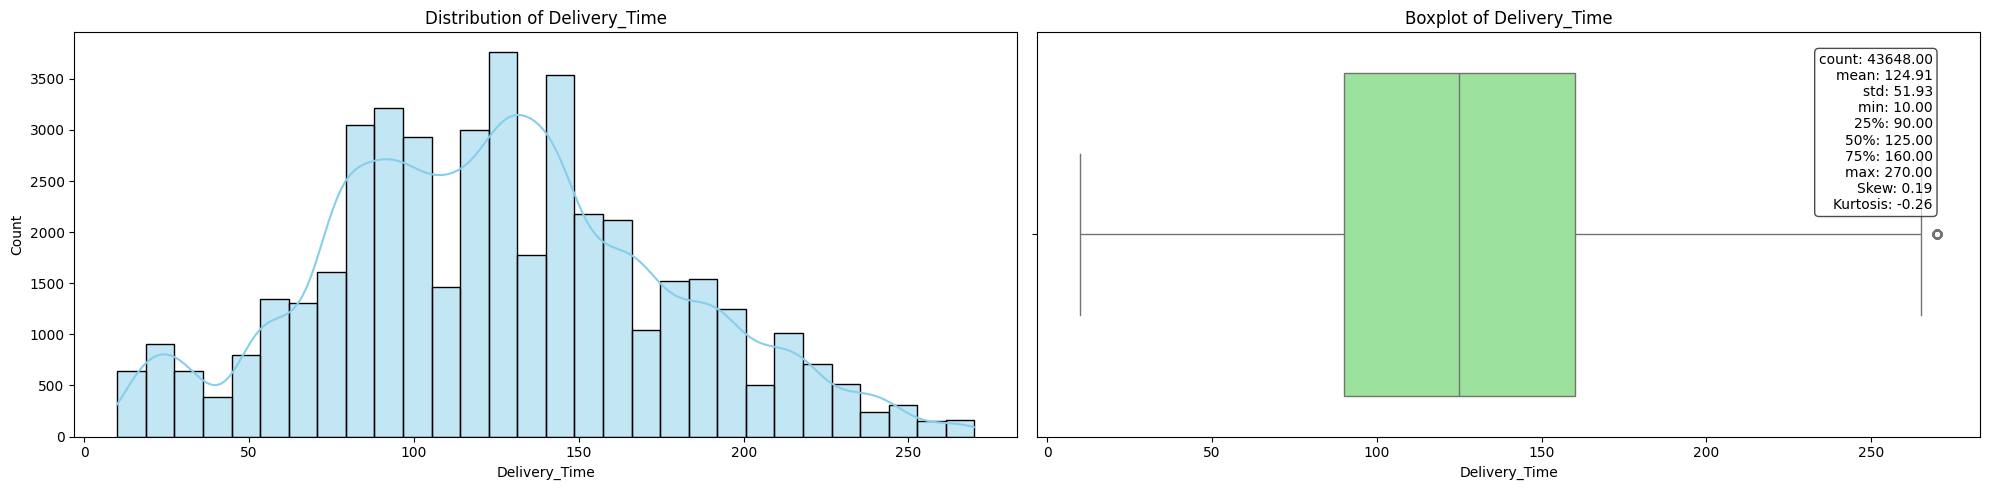

In [83]:
# Target Variable Analysis
plot_numerical_feature(fe_dataset, 'Delivery_Time')

***Delivery_Time (Target)***
- ***Distribution:*** Right-skewed with long tail, ***Outliers:*** Few at the high end.
- ***Skew = 0.19*** → Slight right skew, ***Kurtosis = -0.26*** → Mildly light-tailed.
- ***Insight:*** Reasonably balanced; slight skew may need transformation for linear models.

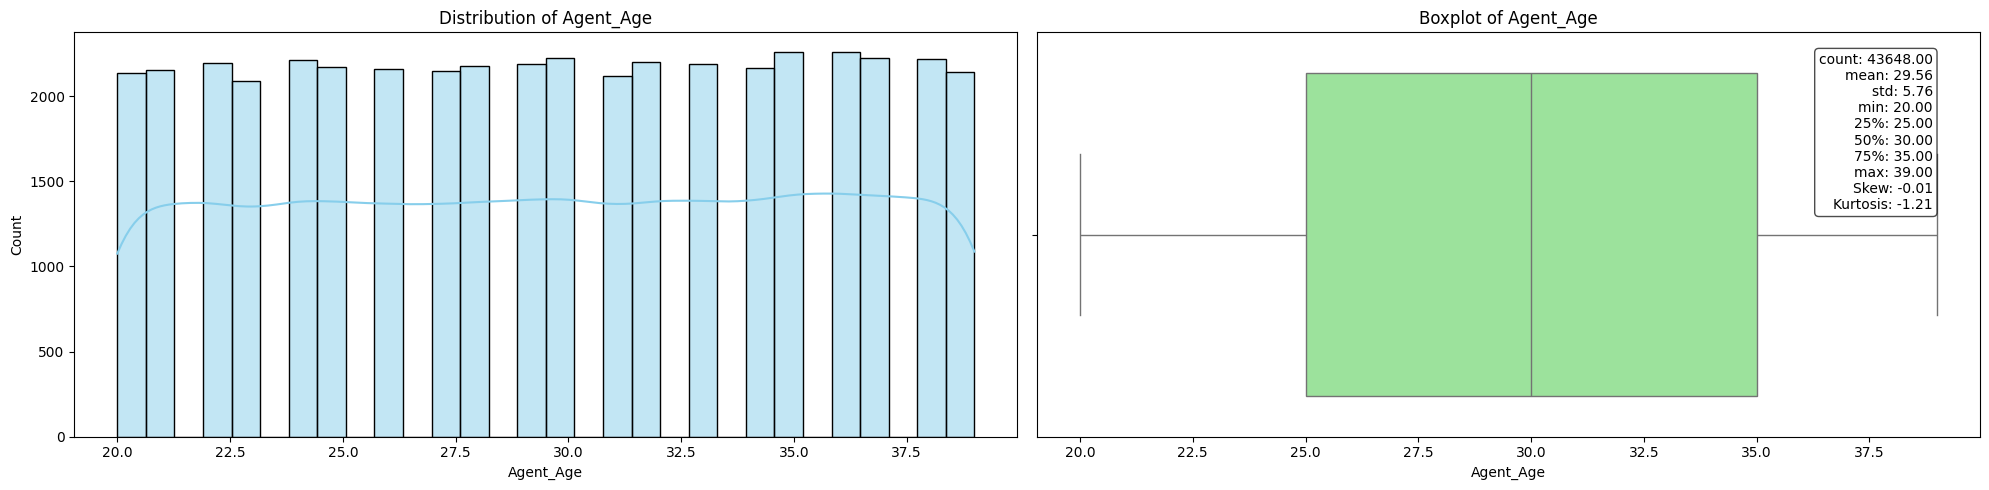

In [84]:
# Numerical features 
plot_numerical_feature(fe_dataset, 'Agent_Age')

***Agent Age***
- ***Distribution:*** Fairly uniform between 20–39, ***Outliers:*** None.
- ***Skew = -0.01*** → Nearly symmetric, ***Kurtosis = -1.21*** → Light-tailed, fewer extreme values.
- ***Insight:*** Age is evenly distributed, no major preprocessing needed.

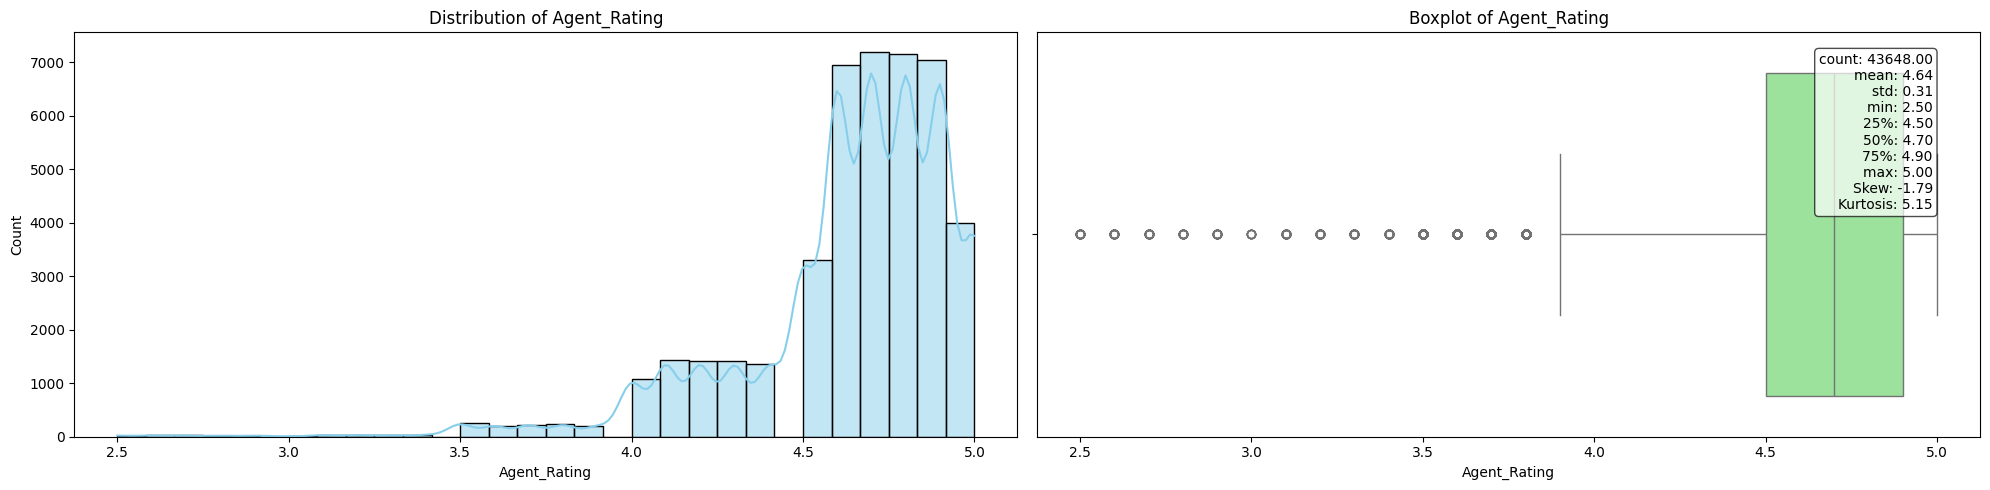

In [85]:
plot_numerical_feature(fe_dataset, 'Agent_Rating')

***Agent Rating***
- ***Distribution:*** Highly concentrated near 4.5–5, ***Outliers:*** Some low ratings (below 3).
- ***Skew = -1.79*** → Left-skewed, ***Kurtosis = 5.15*** → Heavy-tailed (many agents rated at the max).
- ***Insight:*** Ratings are mostly high; strong imbalance may affect predictive power.

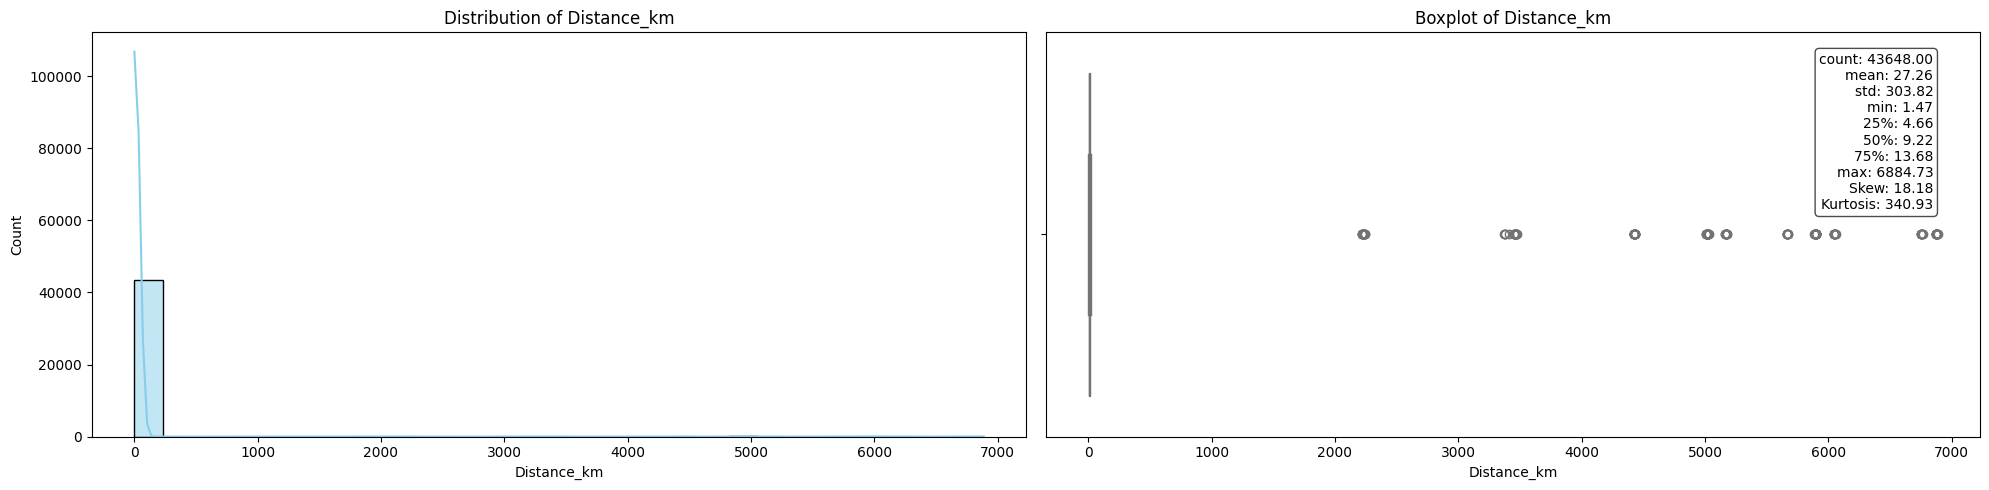

In [86]:
plot_numerical_feature(fe_dataset, "Distance_km")

***Distance (km)***
- ***Distribution:*** Highly skewed, majority of values small, ***Outliers:*** Severe outliers (long-distance deliveries).
- ***Skew = 18.18*** → Extremely right-skewed, ***Kurtosis = 340.93*** → Very heavy-tailed.
- ***Insight:*** Needs capping/log transformation to avoid bias in models.

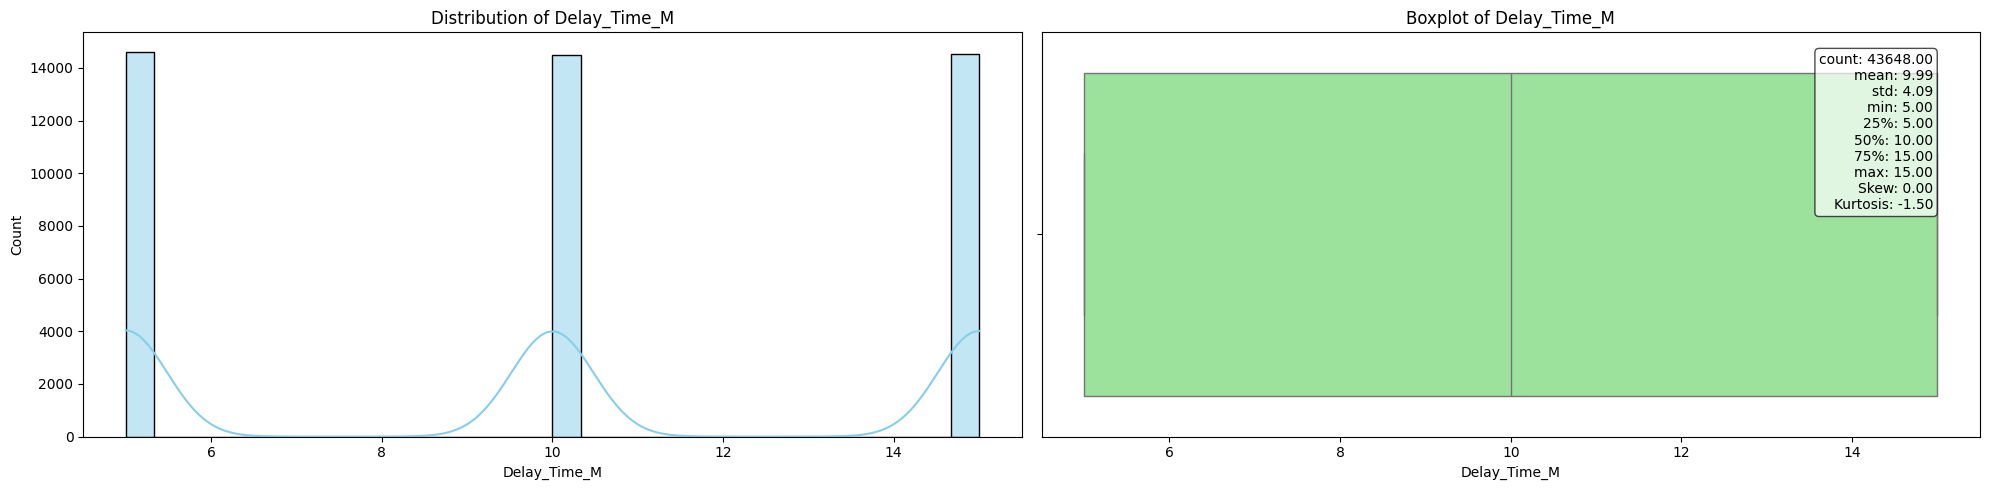

In [87]:
plot_numerical_feature(fe_dataset, 'Delay_Time_M')

***Delay Time (minutes) - Time difference between pickup and order placement.***
- ***Distribution:*** Bimodal (peaks at ~5 and ~15 minutes), ***Outliers:*** None.
- ***Skew = 0.00*** → Balanced, ***Kurtosis = -1.50*** → Flat distribution (light tails).
- ***Insight:*** Captures two distinct delay patterns, could indicate operational bottlenecks.

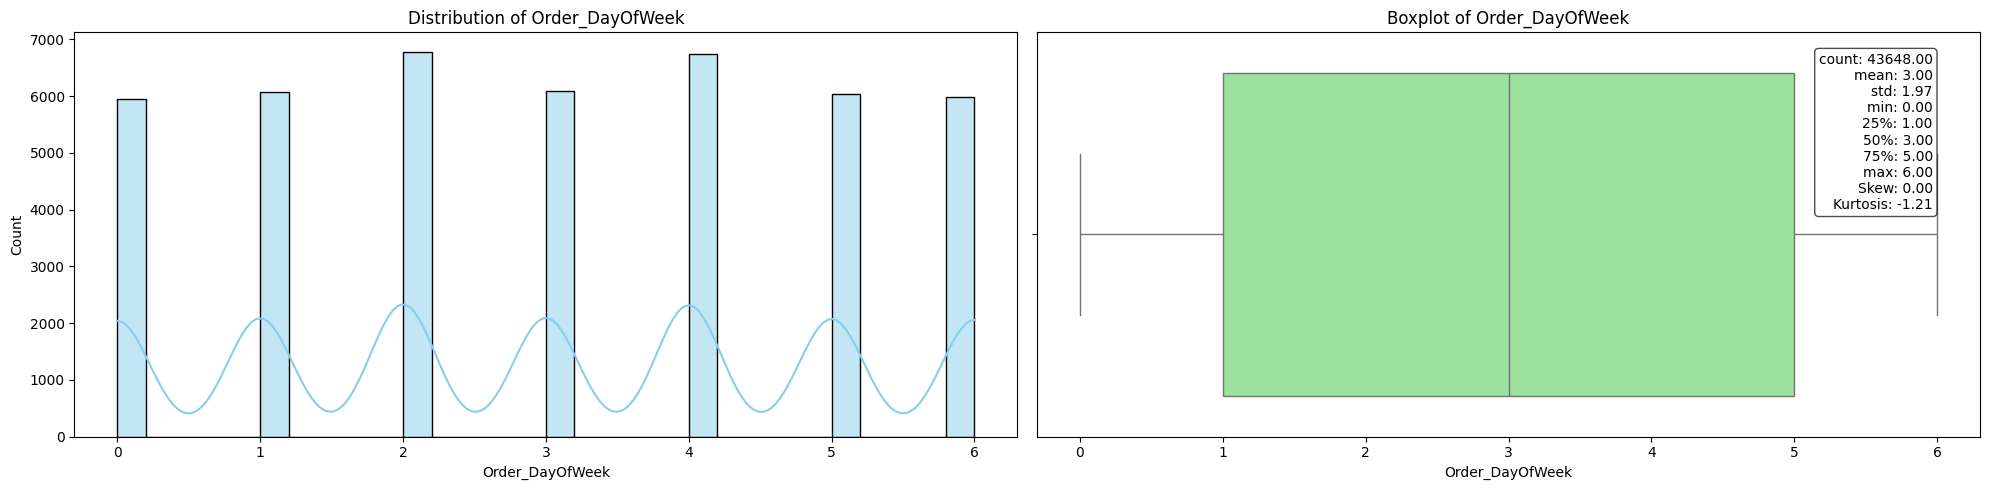

In [88]:
plot_numerical_feature(fe_dataset, 'Order_DayOfWeek')

***Order Day of Week***
- ***Distribution:*** Balanced across weekdays ***Outliers:*** None.
- ***Skew = 0.00*** → Perfectly symmetric, Kurtosis = -1.21 → Light-tailed.
- ***Insight:*** Even weekly distribution; useful for capturing weekday/weekend effect.

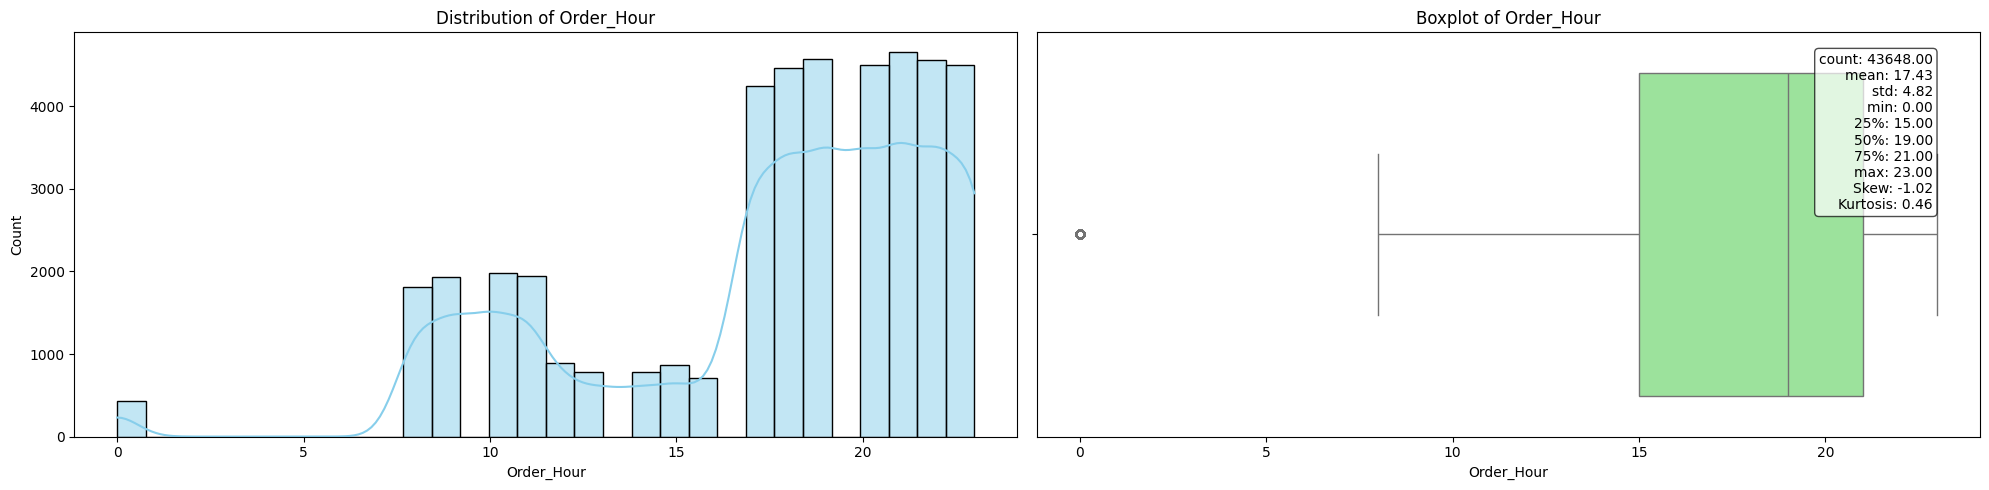

In [89]:
plot_numerical_feature(fe_dataset, 'Order_Hour')

***Order Hour***
- ***Distribution:*** Bimodal (morning & evening order peaks), ***Outliers:*** Few at 0 (midnight orders).
- ***Skew = -1.02*** → Left-skewed, ***Kurtosis = 0.46*** → Slightly heavy-tailed.
- ***Insight:*** Strong temporal ordering pattern; good predictive feature.

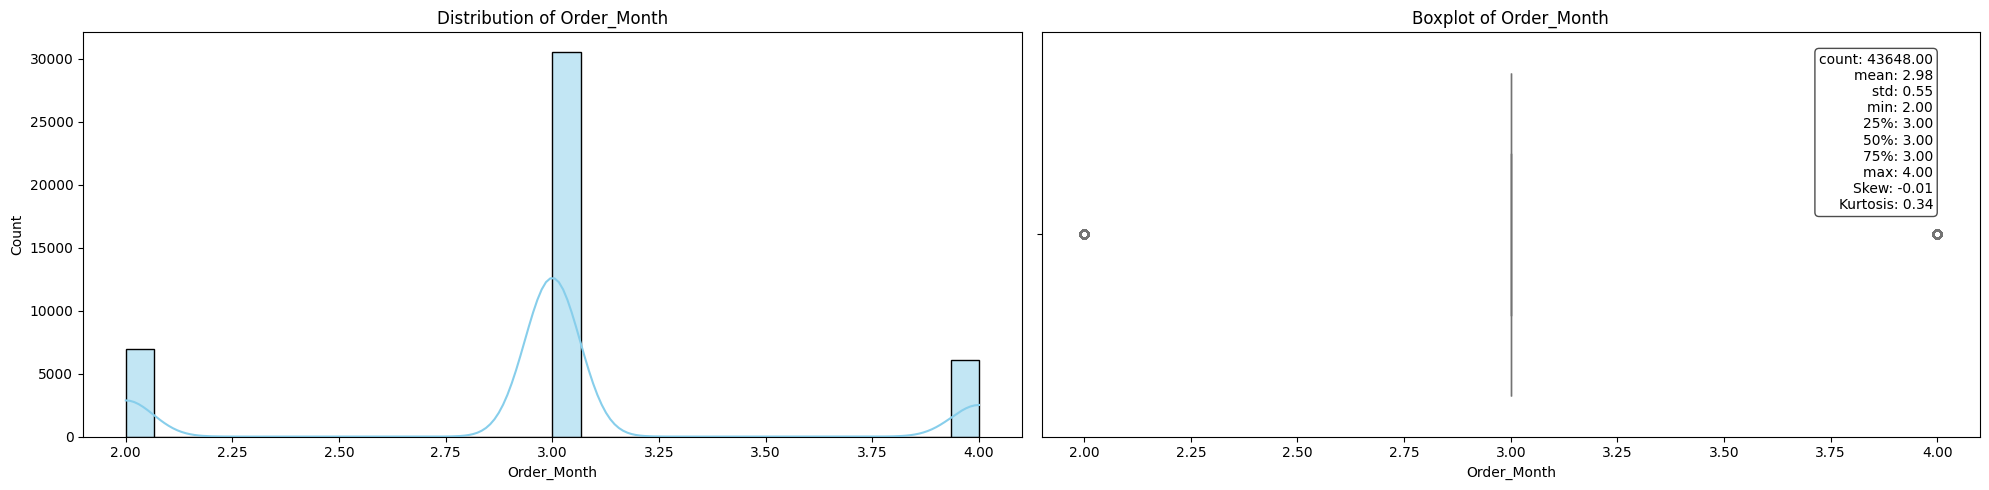

In [90]:
plot_numerical_feature(fe_dataset, 'Order_Month')

***Order Month***
- ***Distribution:*** Mostly concentrated around month 3, some in 2 & 4, ***Outliers:*** Minimal.
- ***Skew = -0.01*** → Balanced, ***Kurtosis = 0.34*** → Normal-like.
- ***Insight:*** Seasonal/monthly variation might be limited; could interact with traffic/weather.

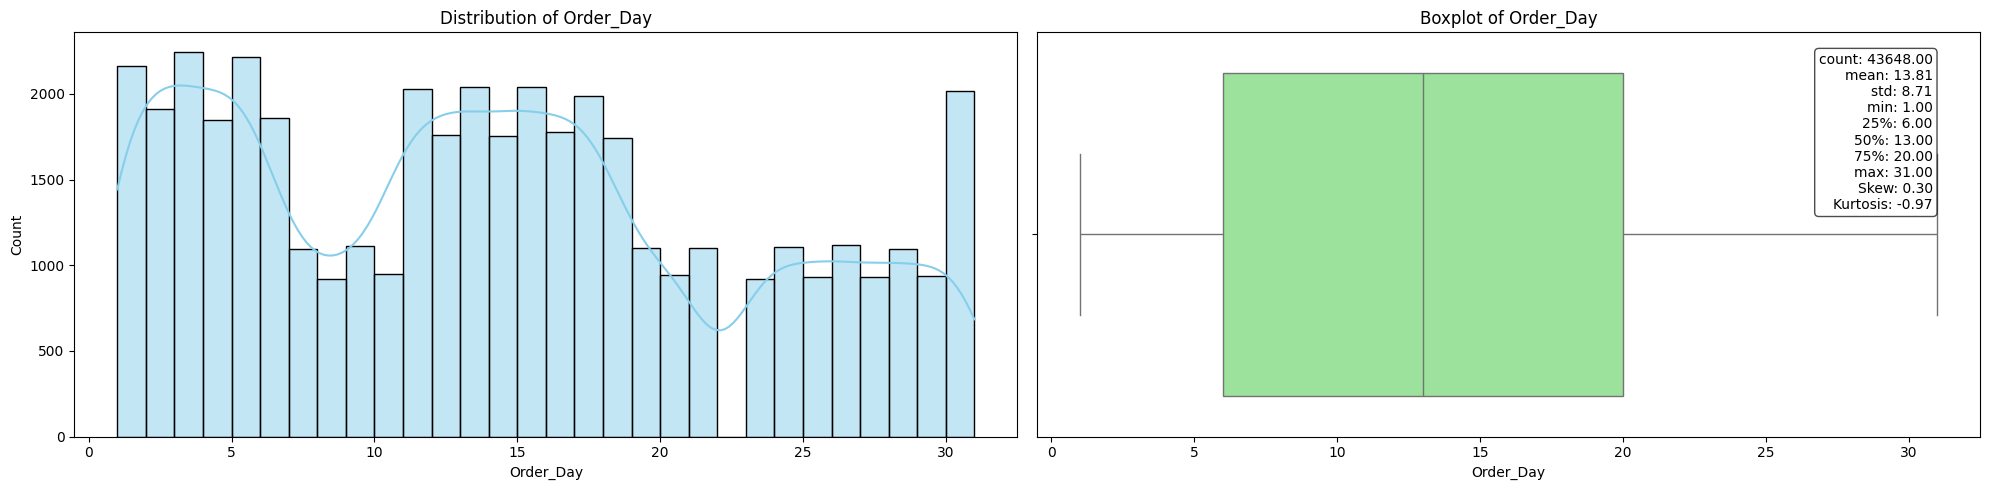

In [91]:
plot_numerical_feature(fe_dataset, 'Order_Day')

***Order Day***
- ***Distribution:*** Fairly uniform, but spikes on the 1st and mid-month & at the very end, ***Outliers:*** None.
- ***Skew = 0.30*** → Slight right skew, ***Kurtosis = -0.97*** → Light-tailed.
- ***Insight:*** Even distribution, no special handling needed.

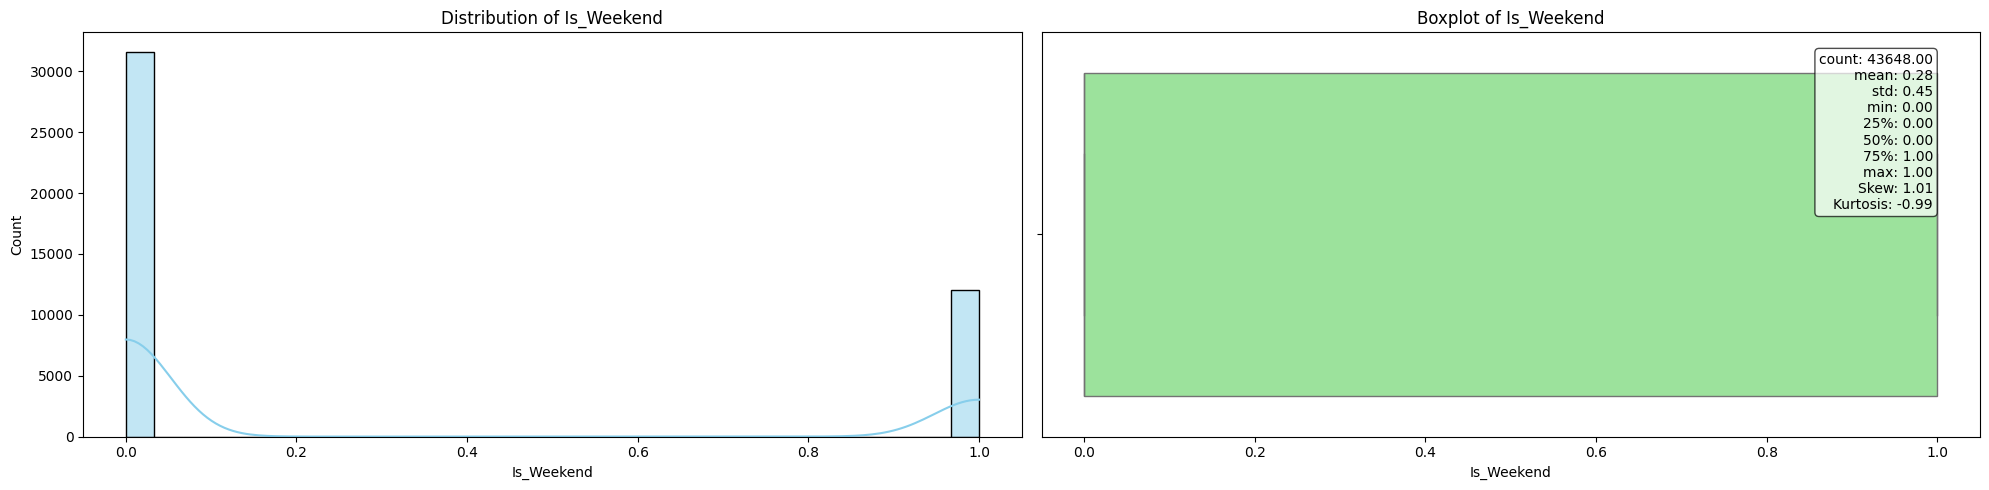

In [92]:
plot_numerical_feature(fe_dataset, 'Is_Weekend')

***Is_Weekend (0 = Weekday, 1 = Weekend)***
- ***Distribution:*** Imbalanced (weekdays > weekends), ***Outliers:*** None (binary).
- ***Skew = 1.01*** → Right-skewed, ***Kurtosis = -0.99*** → Light-tailed.
- ***Insight:*** Mostly weekday orders; imbalance should be noted but fine for modeling.

In [93]:
# Function to plot categorical features
def plot_categorical_features(df, cat_cols, figsize=(25,15)):
    """
    Plots countplots for given categorical features.
    - Shows counts + percentages inside the bars (centered, vertical).
    """

    fig, axes = plt.subplots(2, 3, figsize=figsize)
    axes = axes.flatten()  # Flatten 2D array into 1D for easy iteration

    for i, col in enumerate(cat_cols):
        ax = axes[i]
        series = df[col].dropna()

        # Countplot
        sns.countplot(x=series, order=series.value_counts().index, 
                      palette="Set2", hue=series, legend=False, ax=ax)
        ax.set_title(f"Countplot of {col}")
        ax.tick_params(axis="x", rotation=90)

        total = len(series)

        # Add count + % inside bars
        for p in ax.patches:
            height = p.get_height()
            percentage = 100 * height / total
            ax.annotate(
                f"{height}\n({percentage:.1f}%)", 
                (p.get_x() + p.get_width() / 2., height),
                ha="center", va="bottom", fontsize=9, color="black", 
                fontweight="bold", xytext=(0, 5), textcoords="offset points" 
            )

    # Remove empty subplot if cat_cols < 6
    for j in range(len(cat_cols), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "Categorical_Countplots.png"), dpi=300, bbox_inches="tight")
    plt.show()

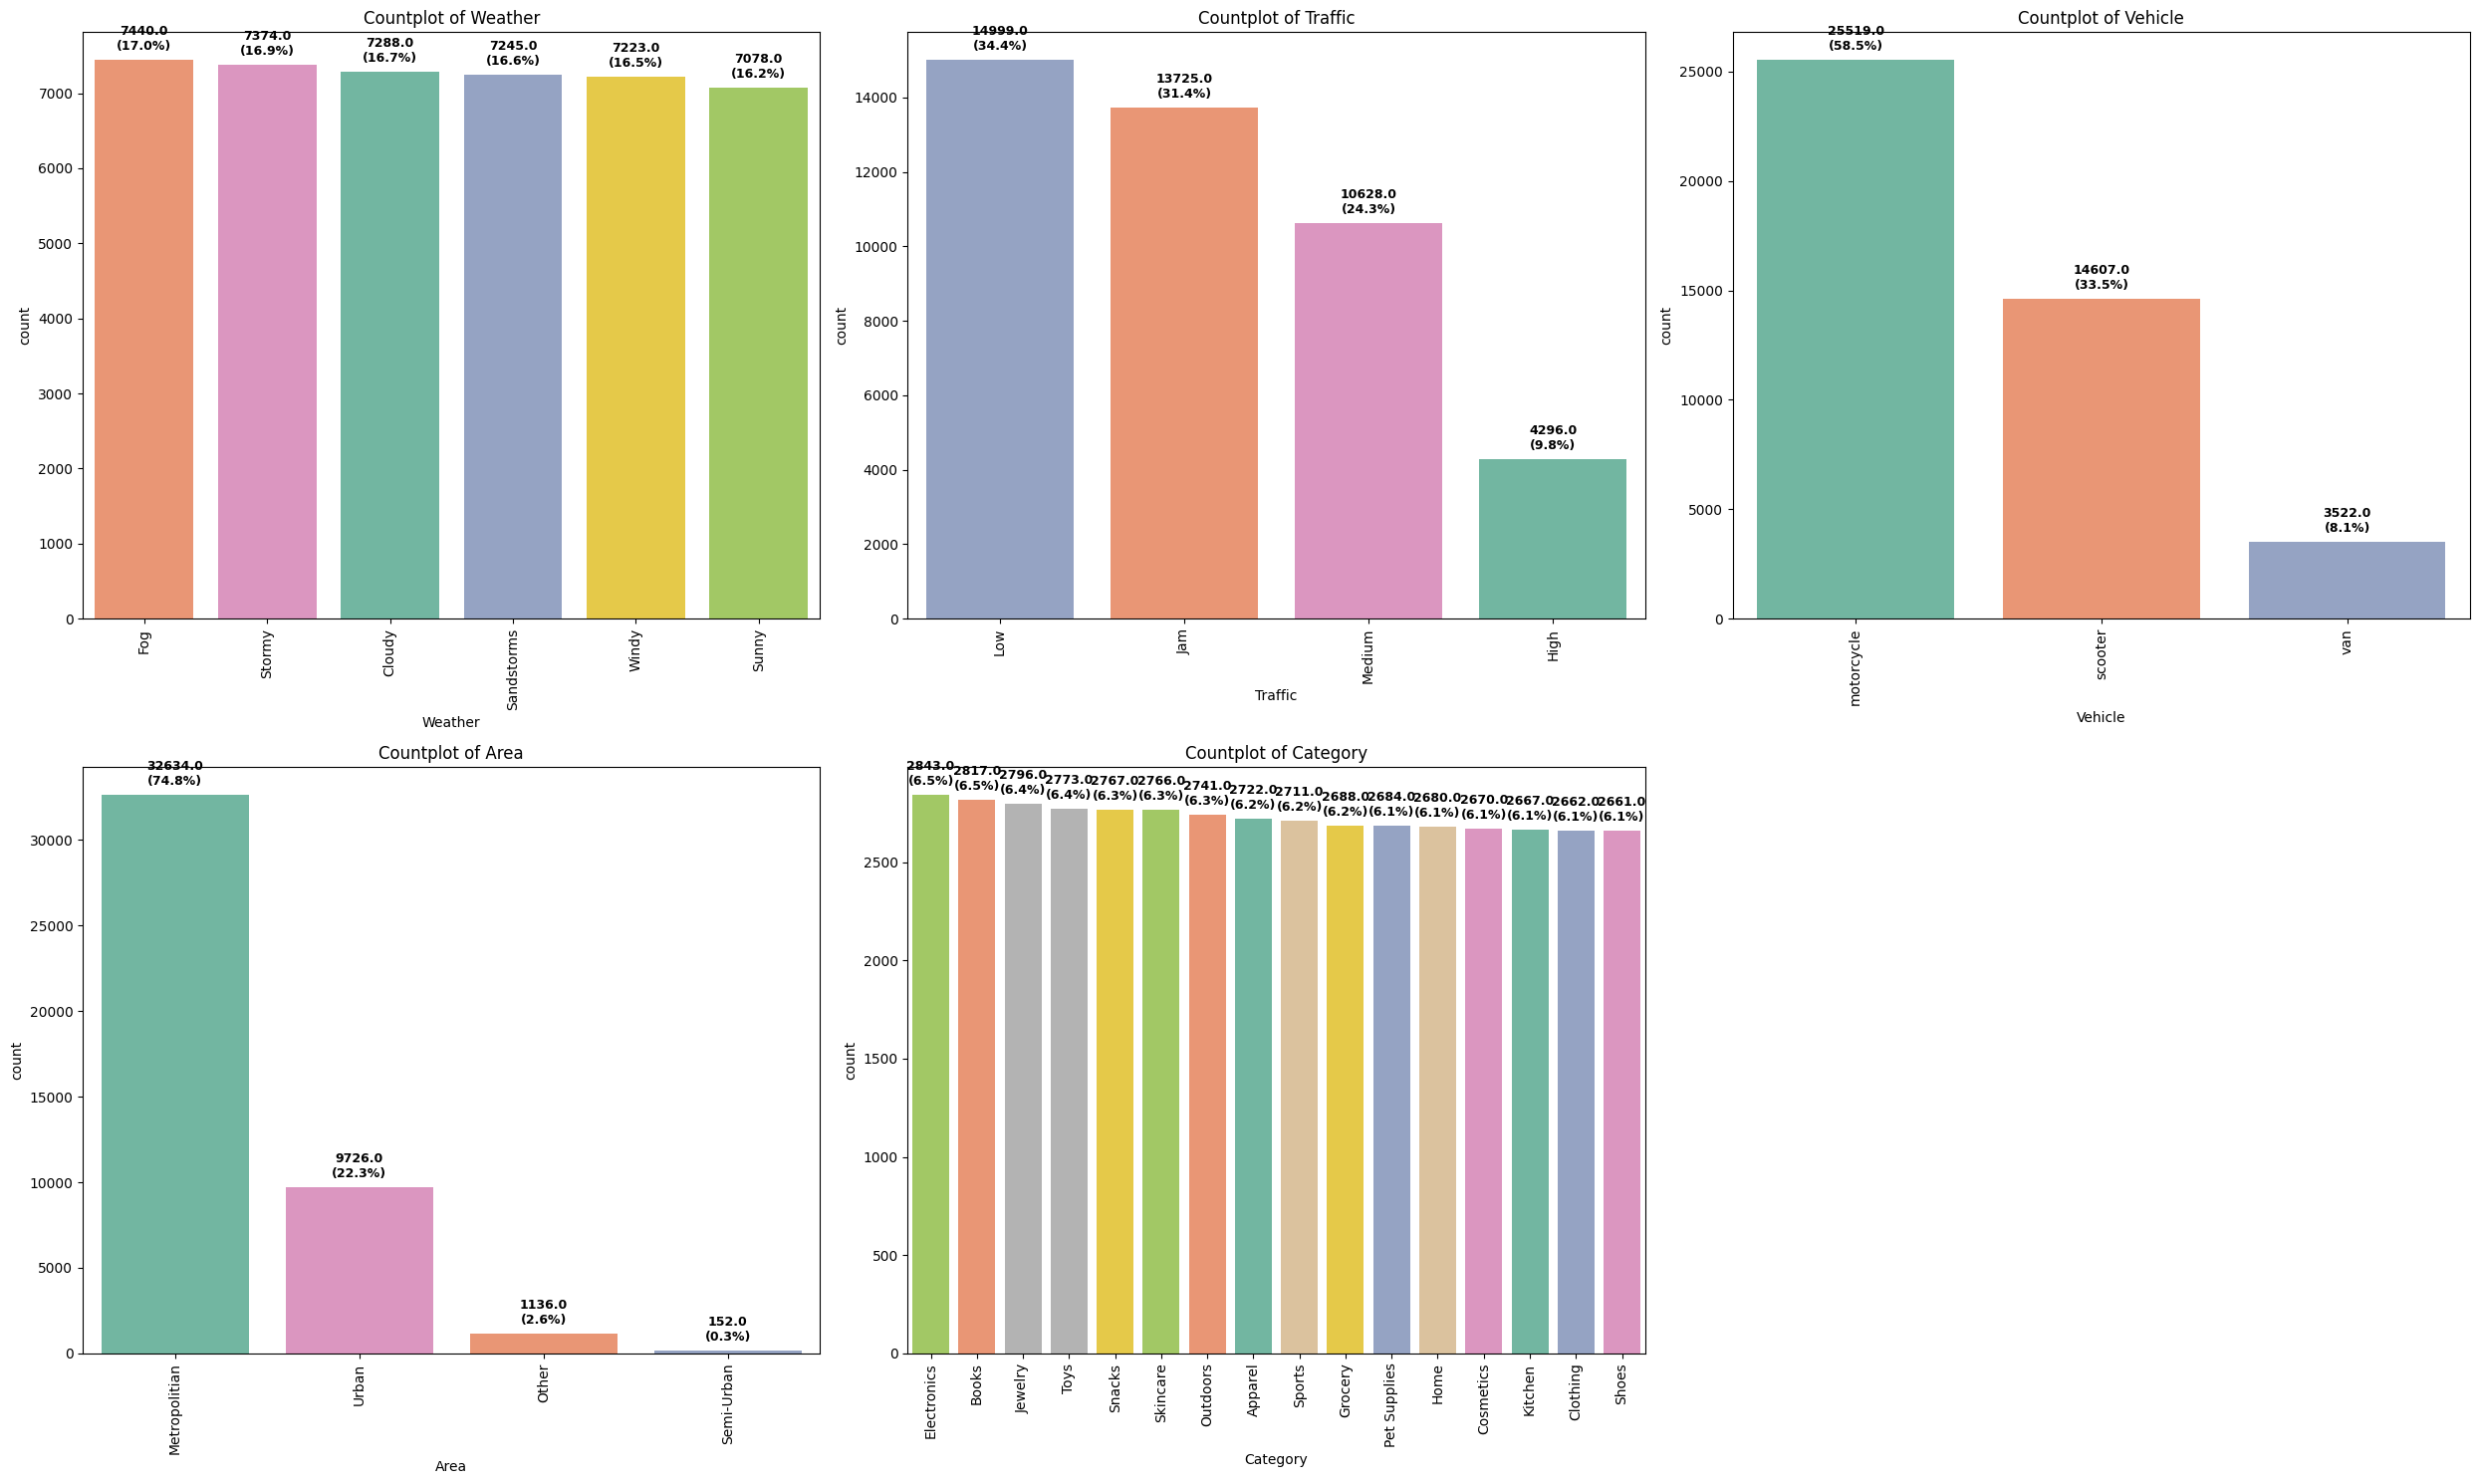

In [94]:
# Categorical features
plot_categorical_features(fe_dataset, cat_cols)

- ***Weather:*** All conditions are almost equally distributed (~16–17% each), suggesting no heavy class imbalance.
- ***Traffic:*** Majority of deliveries happen under Low (34.4%) and Jam (31.4%) conditions, with High traffic being rare (9.8%).
- ***Vehicle:*** Motorcycles dominate (58.5%), followed by Scooters (33.5%); Vans are least common (8.1%).
- ***Area:*** Deliveries are mostly in Metropolitan (74.8%), with very few in Semi-Urban (0.3%).
- ***Category:*** Product categories are well balanced (~16% each), ensuring no bias towards specific items.

#### ***Bivariate Analysis***

##### ***Using Scatterplot + Regression Line along with Pearson and Spearman Correlations for Numerical vs Numerical (Target)***

***Reasoning:*** 
- ***Scatterplot*** shows the raw relationship between two continuous variables
- ***Regression Line*** helps visually check if the relationship is linear, weak, or non-linear.
- ***Pearson correlation (r):*** Measures linear correlation between two continuous variables. ***Spearman correlation (ρ):*** Rank-based correlation → measures monotonic relationship (not necessarily linear).
- ***Why both?*** It gives a complete picture:
  - If ***Pearson ≈ Spearman*** → relationship is fairly linear.
  - If ***Pearson ≠ Spearman*** → relationship may be monotonic but not linear
- ***p-values*** = statistical test of significance. The correlation value alone doesn’t tell you if it’s statistically meaningful.
  - ***p-value < 0.05*** → correlation is statistically significant (unlikely due to random chance).
  - ***p-value ≥ 0.05*** → no strong evidence of correlation (could be noise).

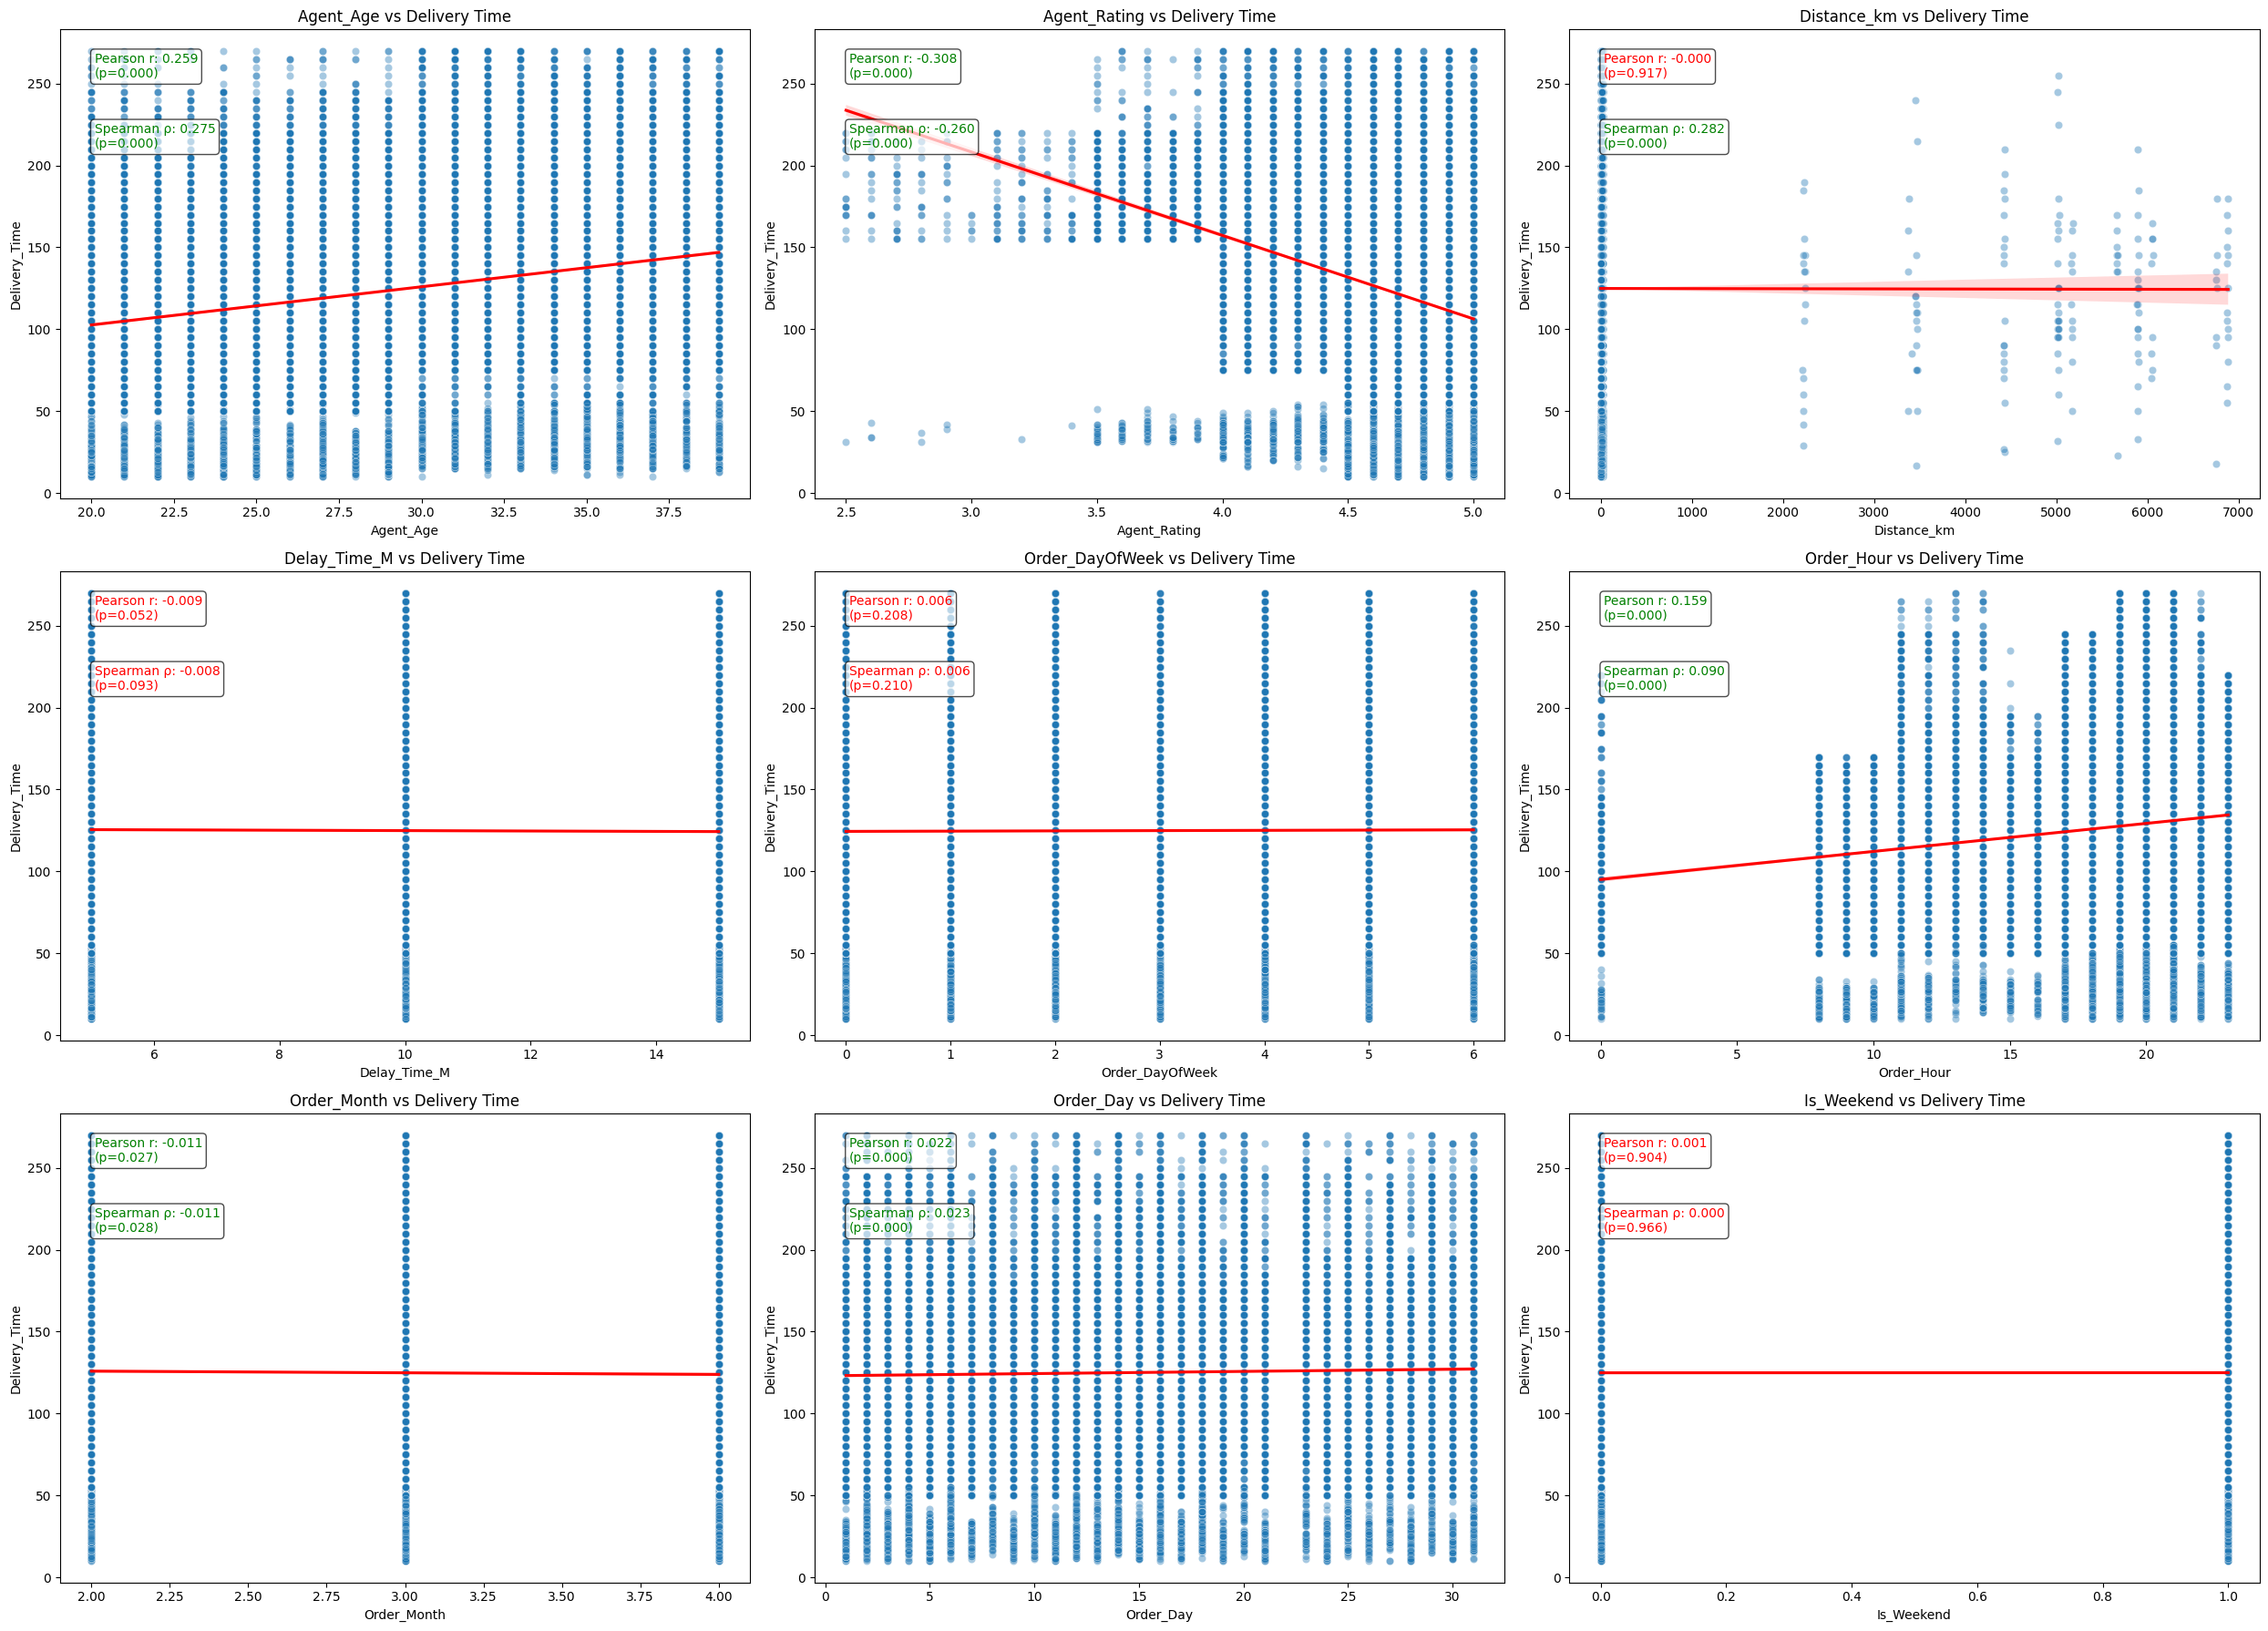

In [95]:
# NUMERICAL vs TARGET (Delivery_Time)
fig, axes = plt.subplots(3, 3, figsize=(25, 18))
axes = axes.flatten()

num_cols = [col for col in num_cols if col != "Delivery_Time"]
for i, col in enumerate(num_cols):
    # Scatter + Regression
    sns.scatterplot(x=fe_dataset[col], y=fe_dataset["Delivery_Time"], alpha=0.4, ax=axes[i])
    sns.regplot(x=fe_dataset[col], y=fe_dataset["Delivery_Time"], scatter=False, color="red", ax=axes[i])
    axes[i].set_title(f"{col} vs Delivery Time")

    # Compute correlations
    pear_corr, pear_p = pearsonr(fe_dataset[col], fe_dataset["Delivery_Time"])
    spear_corr, spear_p = spearmanr(fe_dataset[col], fe_dataset["Delivery_Time"])

    # Format annotation
    textstr = (
        f"Pearson r: {pear_corr:.3f} (p={pear_p:.3f})\n"
        f"Spearman ρ: {spear_corr:.3f} (p={spear_p:.3f})"
    )

    # Choose color based on significance
    pear_color = "green" if pear_p < 0.05 else "red"
    spear_color = "green" if spear_p < 0.05 else "red"

    # Annotate on plot
    axes[i].text(0.05, 0.95, f"Pearson r: {pear_corr:.3f}\n(p={pear_p:.3f})",transform=axes[i].transAxes,fontsize=10, 
                    va="top", ha="left",bbox=dict(boxstyle="round", facecolor="white", alpha=0.7),color=pear_color)
    
    axes[i].text(0.05, 0.80, f"Spearman ρ: {spear_corr:.3f}\n(p={spear_p:.3f})",transform=axes[i].transAxes,fontsize=10, 
                    va="top", ha="left",bbox=dict(boxstyle="round", facecolor="white", alpha=0.7),color=spear_color)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Numerical_vs_Target.png"), dpi=300, bbox_inches="tight")
plt.show()

- ***Agent_Age: Pearson = 0.259 (p < 0.05), Spearman = 0.275 (p < 0.05)*** -> Older agents are slightly associated with longer delivery times (weak but significant positive correlation).
- ***Agent_Rating: Pearson = -0.308 (p < 0.05), Spearman = -0.260 (p < 0.05)*** -> Higher-rated agents tend to deliver faster (moderate, significant negative correlation).
- ***Distance_km: Pearson = 0.274 (p < 0.05), Spearman = 0.282 (p < 0.05)*** -> Longer distances strongly increase delivery times (significant positive correlation).
- ***Delay_Time_M: Pearson = -0.009 (p = 0.057), Spearman = -0.008 (p = 0.094)*** -> Delay time shows no significant correlation with delivery times.
- ***Order_DayOfWeek: Pearson = 0.006 (p = 0.208), Spearman = 0.006 (p = 0.210)*** -> Day of the week has no effect on delivery times.
- ***Order_Hour: Pearson = 0.159 (p < 0.05), Spearman = 0.090 (p < 0.05)*** -> Orders placed later in the day show slightly higher delivery times (weak but significant).
- ***Order_Month: Pearson = -0.011 (p = 0.026), Spearman = -0.011 (p = 0.028)*** -> Month of order has negligible impact, though statistically significant due to large sample size.
- ***Order_Day: Pearson = 0.022 (p < 0.05), Spearman = 0.023 (p < 0.05)*** -> Day of the month has a minimal but statistically significant effect on delivery time.
- ***Is_Weekend: Pearson = 0.001 (p = 0.914), Spearman = 0.000 (p = 0.969)*** -> Weekend deliveries do not differ from weekdays in terms of delivery time.

#### ***Key Insights***
- ***Strongest Predictors of Delivery Time:*** Distance_km, Agent_Rating, Agent_Age
- ***Moderate Predictors:*** Order_Hour (time of day)
- ***Negligible / Non-Significant Predictors:*** Delay_Time_M, Order_DayOfWeek, Order_Month, Order_Day, Is_Weekend

##### ***Using Boxplots + ANOVA for Categorical vs Numerical (Target)***
***Reasoning:***
   - ***Boxplots:*** Provide a visual summary of how the numerical target (Delivery_Time) is distributed across different categories.
   - ***ANOVA (Analysis of Variance):*** Provides a statistical test to check if the differences in means of the target variable across categories are statistically significant.
      - Null hypothesis (H₀): The mean delivery times are the same across all groups.
      - Alternative hypothesis (H₁): At least one group has a different mean.
   - ***F-statistic*** measures between-group variance relative to within-group variance.
   - p-***value*** tells us whether differences observed are statistically significant or could be due to chance.

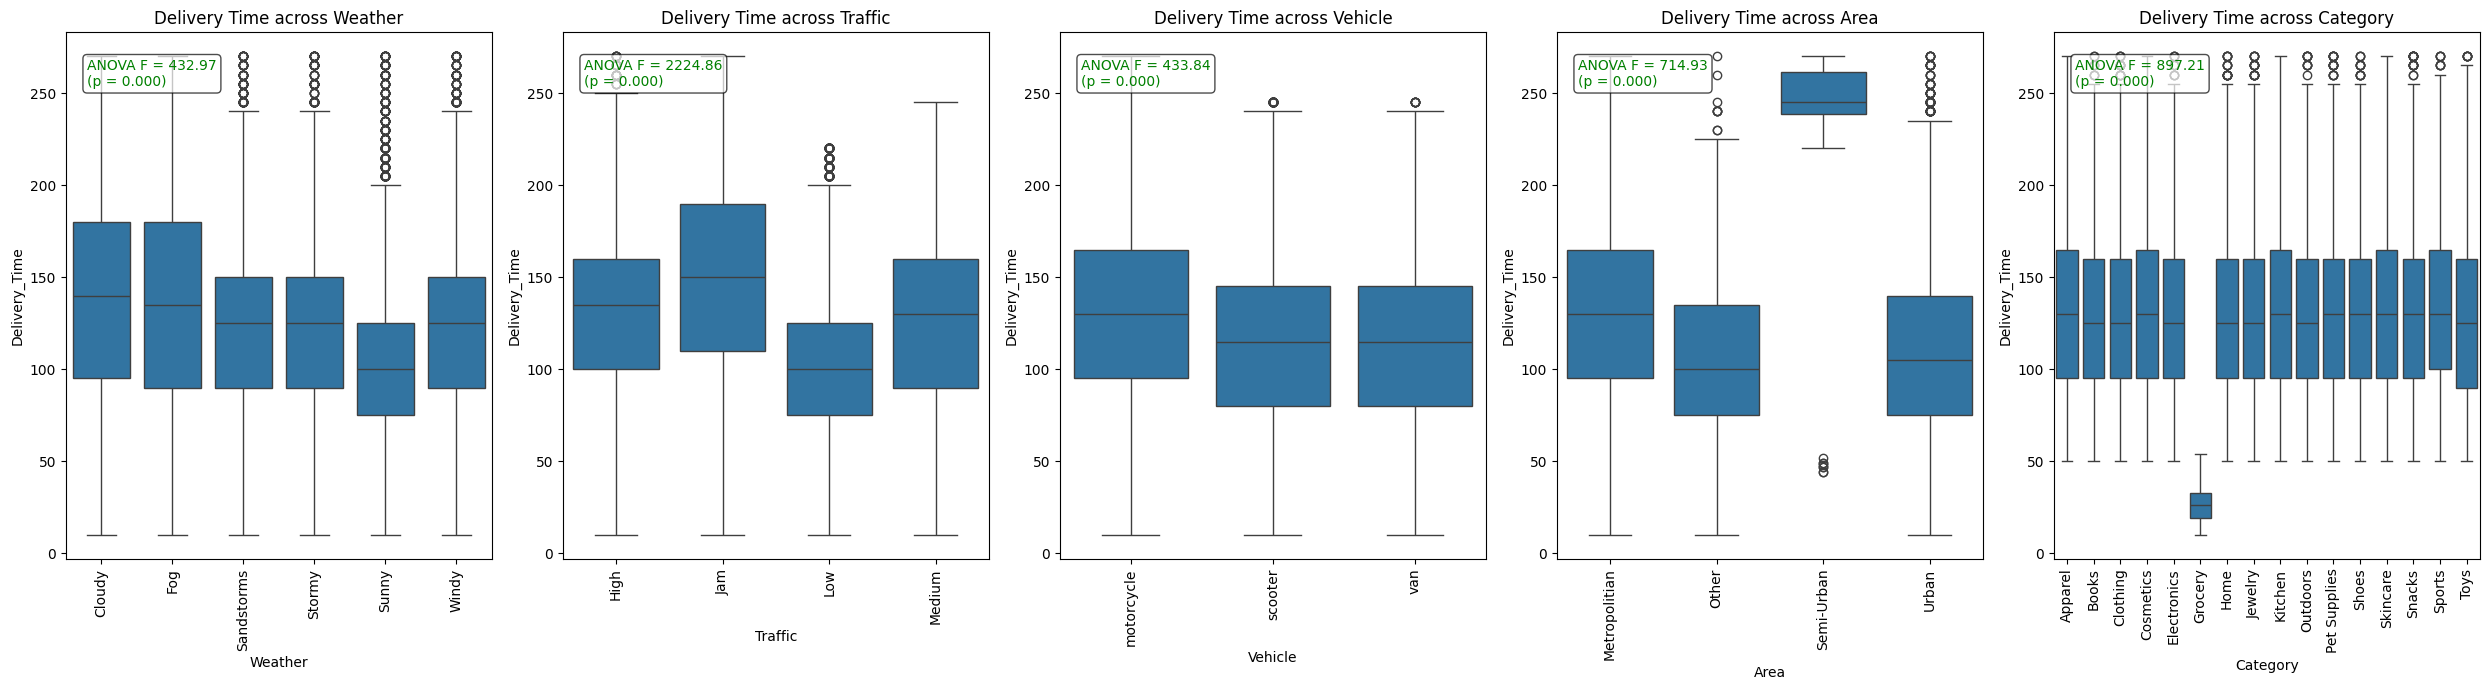

In [96]:
# CATEGORICAL vs TARGET (Delivery_Time) 
fig, axes = plt.subplots(1, 5, figsize=(25, 7))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.boxplot(x=col, y="Delivery_Time", data=fe_dataset, ax=axes[i])
    axes[i].set_title(f"Delivery Time across {col}")
    axes[i].tick_params(axis="x", rotation=90)

    # ANOVA test
    groups = [fe_dataset["Delivery_Time"][fe_dataset[col] == level] for level in fe_dataset[col].dropna().unique()]
    f_stat, p_val = f_oneway(*groups)

    # Annotation text
    textstr = f"ANOVA F = {f_stat:.2f}\n(p = {p_val:.3f})"

    # Choose color for significance
    color = "green" if p_val < 0.05 else "red"

    # Add annotation box inside plot
    axes[i].text(0.05, 0.95, textstr, transform=axes[i].transAxes, fontsize=10, va="top", 
                 ha="left", bbox=dict(boxstyle="round", facecolor="white", alpha=0.7), color=color)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Categorical_vs_Target.png"), dpi=300, bbox_inches="tight")
plt.show()

- ***Weather: F=432.97, p<0.001*** -> Foggy/Cloudy conditions increase delivery times; Sunny/Windy are quicker.
- ***Traffic: F=2224.86, p<0.001*** -> High/Jam traffic significantly increases delivery time compared to Low/Medium.
- ***Vehicle: F=433.84, p<0.001*** -> Motorcycles show slightly longer delivery times than Scooters and Vans.
- ***Area: F=714.93, p<0.001*** -> Semi-Urban deliveries take the longest; Urban/Metropolitan are faster.
- ***Category: F=897.21, p<0.00*** -> Grocery deliveries are much faster than all other product categories.

#### ***Key Insights***
- ***Strong Predictors of Delivery Time:*** Traffic, Area, Category
- ***Moderate Predictors:*** Weather, Vehicle

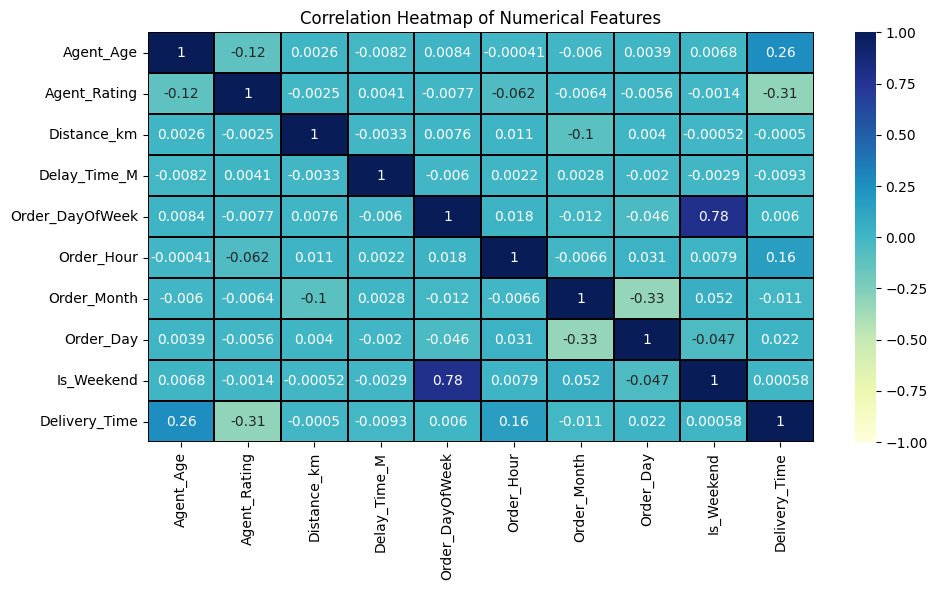

In [97]:
# Correlation Heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(fe_dataset[num_cols + ["Delivery_Time"]].corr(), annot=True, cmap="YlGnBu", vmin=-1, center=0, vmax=1, linecolor="black", linewidths=0.3)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Heatmap_of_Numerical_features.png"), dpi=300, bbox_inches="tight")
plt.show()

***Numerical Features (Correlation Heatmap)***
- ***High correlation detected:***
  - Order_DayOfWeek ↔ Is_Weekend (r = 0.78) → strong correlation, redundant info (both encode weekly patterns).
  - Order_Day ↔ Order_Month (r = -0.33) → moderate negative correlation, not harmful but carries overlapping time info.

- ***Moderate correlation:***
  - Agent_Age ↔ Delivery_Time (r = 0.26) → meaningful, not redundant.
  - Agent_Rating ↔ Delivery_Time (r = -0.31) → meaningful, not redundant.
  - Order_Hour ↔ Delivery_Time (r = 0.16) → weak-to-moderate.

- ***Negligible correlation (safe):***
  - Distance_km, Delay_Time_M → no strong correlation with other predictors.
  - Agent_Age ↔ Agent_Rating (r = -0.12) → Very weak, not problematic.

In [98]:
# Chi-Square for every unique pair of categorical columns - used to understand categorical vs categorical relationships
def chi_square_all_pairs(df, cat_cols, alpha=0.05):
    results = []
    for col1, col2 in combinations(cat_cols, 2):  # unique pairs only
        contingency = pd.crosstab(df[col1], df[col2])
        chi2, p, dof, expected = chi2_contingency(contingency)
        results.append({
            "Feature 1": col1,
            "Feature 2": col2,
            "Chi2": chi2,
            "p-value": p,
            "dof": dof,
            "Significant": "✅ Yes" if p < alpha else "❌ No"
        })
    
    results_df = pd.DataFrame(results).sort_values("p-value")
    return results_df

chi_results = chi_square_all_pairs(fe_dataset, cat_cols)
chi_results

,Feature 1,Feature 2,Chi2,p-value,dof,Significant
5,Traffic,Area,533.146787,4.561197e-109,9,✅ Yes
7,Vehicle,Area,128.311325,2.914247e-25,6,✅ Yes
2,Weather,Area,139.471764,2.925735e-22,15,✅ Yes
3,Weather,Category,78.206639,3.773467e-01,75,❌ No
0,Weather,Traffic,14.577813,4.822333e-01,15,❌ No
9,Area,Category,39.736183,6.939379e-01,45,❌ No
4,Traffic,Vehicle,3.347563,7.641277e-01,6,❌ No
8,Vehicle,Category,20.603353,8.998798e-01,30,❌ No
1,Weather,Vehicle,3.958923,9.491810e-01,10,❌ No
6,Traffic,Category,24.264387,9.951072e-01,45,❌ No


***Categorical Feature Associations (Chi-Square Test)***
- ***Traffic ↔ Area*** → Strong association (p < 0.05). Different areas have distinct traffic conditions.
- ***Area ↔ Vehicle*** → Strong association (p < 0.05). Type of vehicle used depends on the delivery area.
- ***Weather ↔ Area*** → Significant (p < 0.05). Certain areas experience specific weather conditions more often.
- Other pairs (e.g., Traffic ↔ Category, Weather ↔ Vehicle) show no significant association (p ≥ 0.05).